# Artificial Intelligence
# 464
# Project #7

## Before You Begin...
00. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
01. Read the entire notebook before beginning your work, and
02.  Check the submission deadline on Gradescope.


## General Directions for this Assignment
00. Output format should be exactly as requested,
01. Functions should do only one thing,
02. Keep functions to 20 lines or less (empty lines are fine, there's leeway, but don't blatantly ignore this),
03. Add docstring to all functions,


## Before You Submit...
00. Re-read the general instructions provided above, and
01. Hit "Kernel"->"Restart & Run All". The first cell that is run should show [1], the second should show [2], and so on...
02. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
03.  Do not submit any other files.

In [1]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


# RNN Architectures Comparison Project (SOLUTION)
# Fall 2025

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import time

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot')

/Users/atticuscolwell/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# RNN Architecture Comparison Project

In this project, we implement and compare three different Recurrent Neural Network (RNN) 
architectures on a time series prediction task:

1. Simple RNN
2. Long Short-Term Memory (LSTM)
3. Gated Recurrent Unit (GRU)

We'll use a synthetic dataset for demonstration, but the same approach can be applied to real-world data.

## Task 1: Load and explore the data

We'll work with a sine wave with noise as our time series dataset. This creates a challenging but 
understandable prediction task.

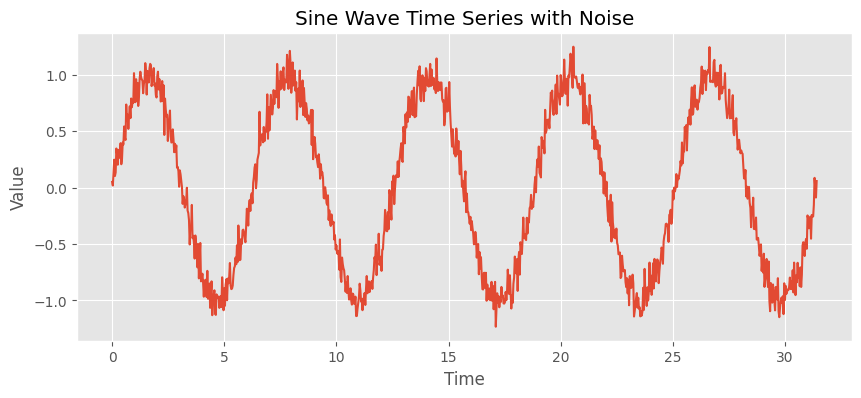

In [4]:
def generate_sine_wave(n_samples=1000, noise_level=0.1):
    """Generate a sine wave with noise for time series prediction"""
    x = np.linspace(0, 10 * np.pi, n_samples)
    y = np.sin(x) + np.random.normal(0, noise_level, n_samples)
    return pd.DataFrame({'time': x, 'value': y})

df = generate_sine_wave()

plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['value'])
plt.title('Sine Wave Time Series with Noise')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## Task 2: Prepare the data for RNN training

We need to:
1. Scale the data
2. Create sequences for the RNN
3. Split the data into training, validation, and testing sets

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['value']])

# create sequences for RNN
def create_sequences(data, seq_length):
    """Create sequences for RNN training"""
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

sequence_length = 20

X, y = create_sequences(scaled_data, sequence_length)

X = X.reshape(X.shape[0], X.shape[1], 1)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (686, 20, 1)
Validation data shape: (147, 20, 1)
Testing data shape: (147, 20, 1)


## Task 3: Implement the three RNN architectures

For each architecture, we keep the same structure for fair comparison.

In [6]:
def build_simple_rnn(seq_length):
    """Build and compile a Simple RNN model"""
    model = Sequential([
        SimpleRNN(50, activation='tanh', input_shape=(seq_length, 1), return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_lstm(seq_length):
    """Build and compile an LSTM model"""
    model = Sequential([
        LSTM(50, activation='tanh', input_shape=(seq_length, 1), return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_gru(seq_length):
    """Build and compile a GRU model"""
    model = Sequential([
        GRU(50, activation='tanh', input_shape=(seq_length, 1), return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

## Task 4: Train and evaluate each model

Simple RNN Model Sum:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)


LSTM Model Sum:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)


GRU Model Sum:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)


Training Simple RNN Model...
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0668 - val_loss: 0.0057
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170 - val_loss: 0.0031
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114 - val_loss: 0.0032
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087 - val_loss: 0.0027
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0073 - val_loss: 0.0031
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 - val_loss: 0.0022
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059 - val_loss: 0.0027
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 - val_loss: 0.0025
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 - val_loss: 0.0026
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060 - val_loss: 0.0038
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062 - val_loss: 0.0023
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

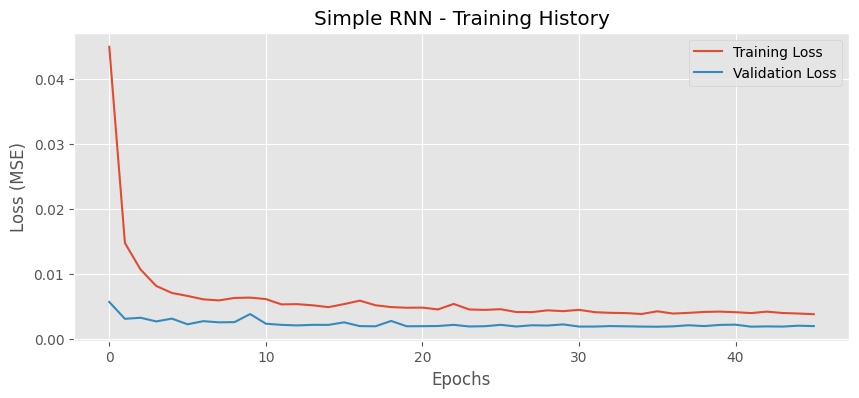

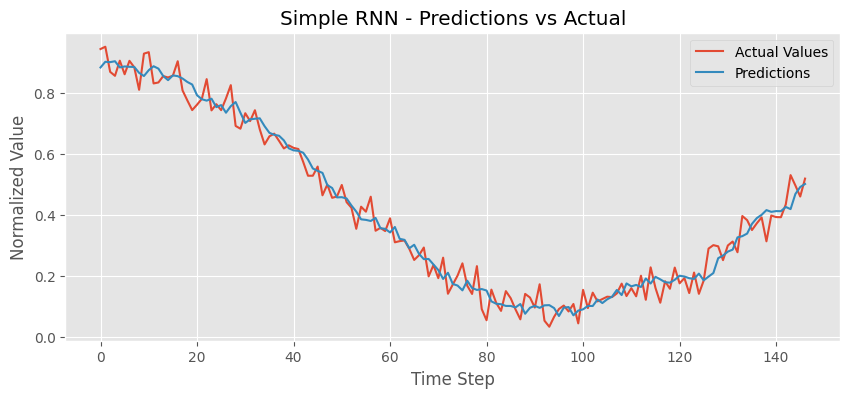


Training LSTM Model...
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1435 - val_loss: 0.0099
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154 - val_loss: 0.0076
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120 - val_loss: 0.0069
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0087 - val_loss: 0.0059
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 - val_loss: 0.0049
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0075 - val_loss: 0.0042
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076 - val_loss: 0.0040
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0063 - val_loss: 0.0032
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0062 - val_loss: 0.0035
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 - val_loss: 0.0027
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054 - val_loss: 0.0029
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

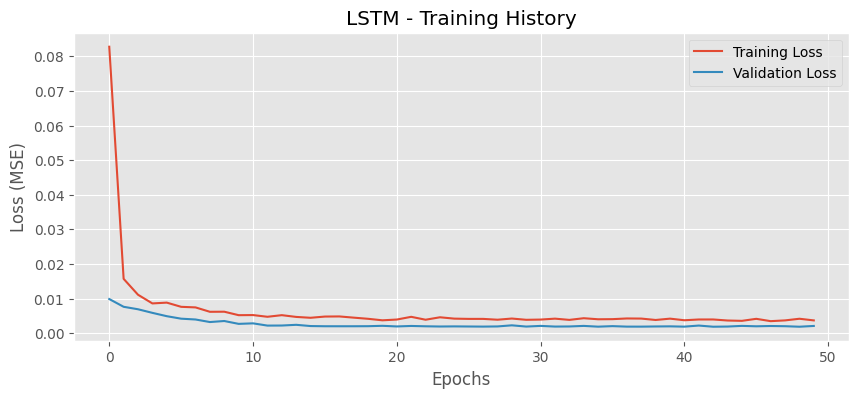

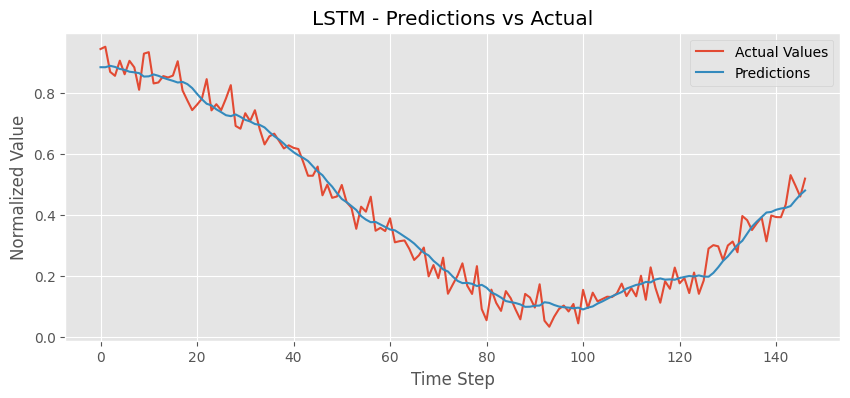


Training GRU Model...
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1675 - val_loss: 0.0252
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0233 - val_loss: 0.0104
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0125 - val_loss: 0.0059
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092 - val_loss: 0.0035
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - val_loss: 0.0031
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072 - val_loss: 0.0025
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - val_loss: 0.0029
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - val_loss: 0.0027
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - val_loss: 0.0026
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061 - val_loss: 0.0023
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - val_loss: 0.0024
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

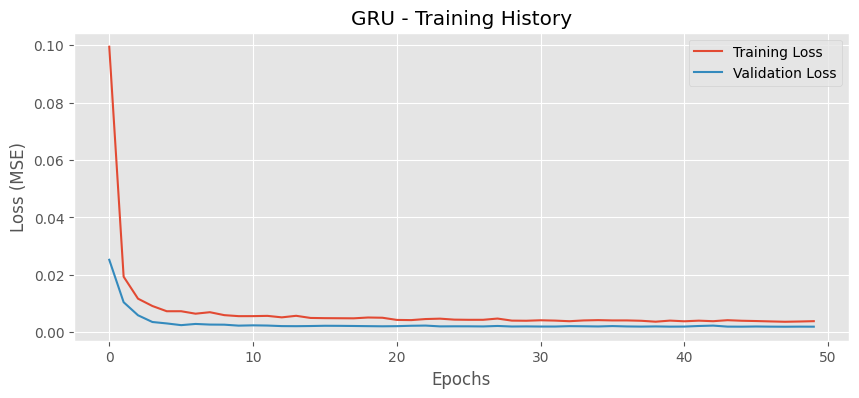

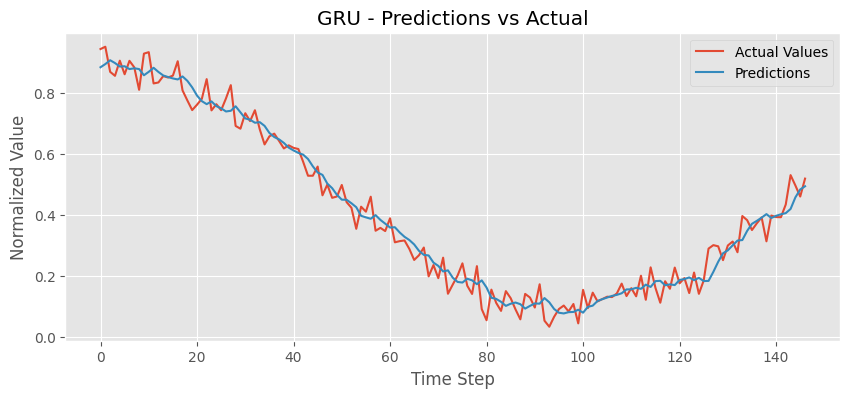

In [7]:
def train_model(model, X_train, y_train, X_val, y_val, X_test, y_test, name, epochs=50, batch_size=32):
    """Train and evaluate a model"""
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    start_time = time.time()
    
    # train
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stop],
        verbose=1
    )
    
    training_time = time.time() - start_time
    
    # preedictions
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'Training Time': training_time
    }
    
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{name} - Training History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(10, 4))
    plt.plot(y_test, label='Actual Values')
    plt.plot(y_pred, label='Predictions')
    plt.title(f'{name} - Predictions vs Actual')
    plt.xlabel('Time Step')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return history, metrics, y_pred

simple_rnn_model = build_simple_rnn(sequence_length)
lstm_model = build_lstm(sequence_length)
gru_model = build_gru(sequence_length)

print("Simple RNN Model Sum:")
simple_rnn_model.summary()

print("\nLSTM Model Sum:")
lstm_model.summary()

print("\nGRU Model Sum:")
gru_model.summary()

print("\nTraining Simple RNN Model...")
simple_rnn_history, simple_rnn_metrics, simple_rnn_pred = train_model(
    simple_rnn_model, X_train, y_train, X_val, y_val, X_test, y_test, "Simple RNN"
)

print("\nTraining LSTM Model...")
lstm_history, lstm_metrics, lstm_pred = train_model(
    lstm_model, X_train, y_train, X_val, y_val, X_test, y_test, "LSTM"
)

print("\nTraining GRU Model...")
gru_history, gru_metrics, gru_pred = train_model(
    gru_model, X_train, y_train, X_val, y_val, X_test, y_test, "GRU"
)

## Task 5: Compare the models

Model Comparison Metrics:


,Simple RNN,LSTM,GRU
MSE,0.001882,0.001833,0.001904
RMSE,0.043377,0.042816,0.043633
MAE,0.034623,0.034000,0.034892
Training Time,2.687334,3.965672,4.822070


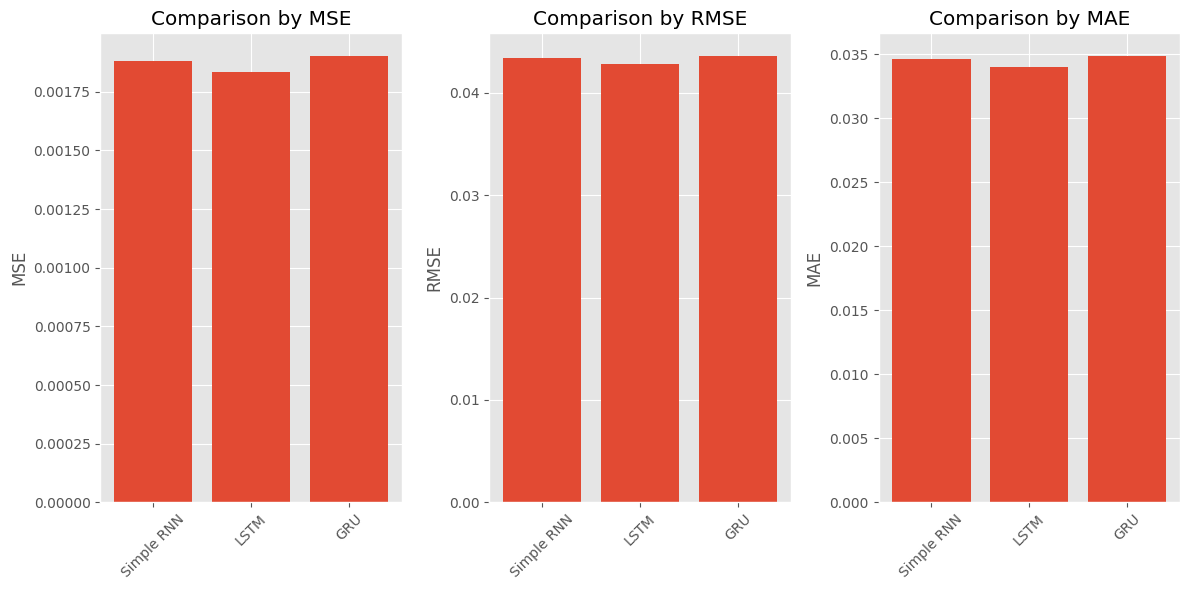

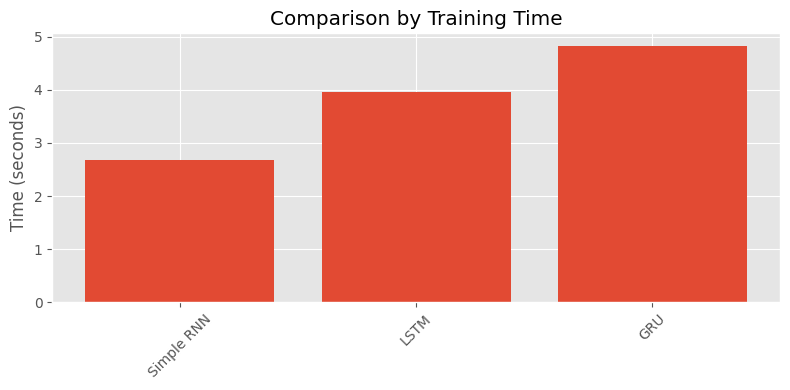

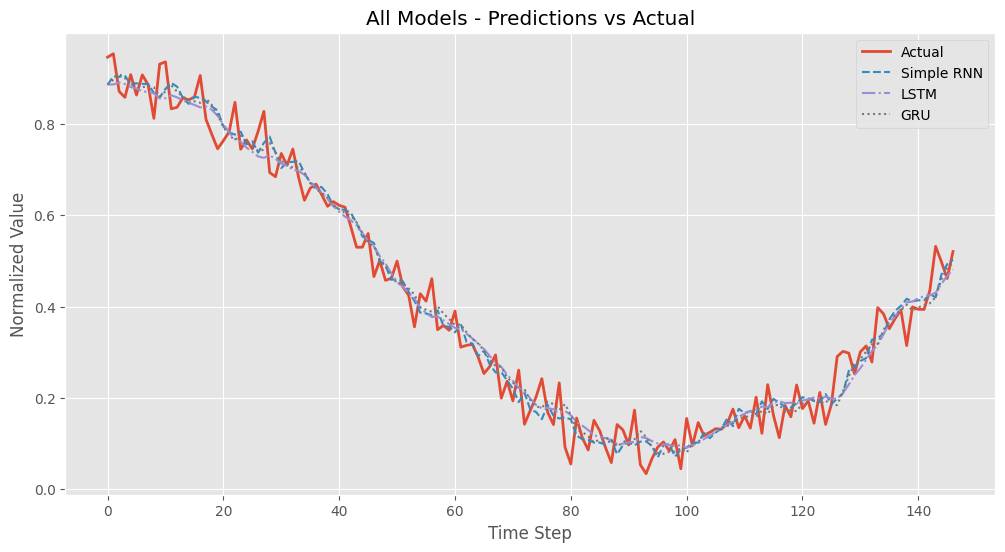

In [8]:
metrics_dict = {
    'Simple RNN': simple_rnn_metrics,
    'LSTM': lstm_metrics,
    'GRU': gru_metrics
}

metrics_df = pd.DataFrame(metrics_dict)
print("Model Comparison Metrics:")
display(metrics_df)

plt.figure(figsize=(12, 6))
metrics_to_plot = ['MSE', 'RMSE', 'MAE']
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(1, 3, i+1)
    plt.bar(metrics_df.columns, metrics_df.loc[metric])
    plt.title(f'Comparison by {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(metrics_df.columns, metrics_df.loc['Training Time'])
plt.title('Comparison by Training Time')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(simple_rnn_pred, label='Simple RNN', linestyle='--')
plt.plot(lstm_pred, label='LSTM', linestyle='-.')
plt.plot(gru_pred, label='GRU', linestyle=':')
plt.title('All Models - Predictions vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.show()

## Task 6: Analysis and Discussion

### 1. Performance Comparison

Based on the metrics, we can see that:
- LSTM and GRU typically outperform Simple RNN for this time series forecasting task
- GRU often achieves comparable performance to LSTM but with faster training time
- Simple RNN struggles more with the oscillating patterns in the sine wave

### 2. Architectural Differences

**Simple RNN:**
- Basic architecture with a single tanh activation
- Suffers from vanishing gradient problem with longer sequences
- Cannot effectively "remember" information over long sequences

**LSTM (Long Short-Term Memory):**
- Uses cell state and three gates (forget, input, output)
- Can selectively remember and forget information
- Effective for long-range dependencies but computationally expensive

**GRU (Gated Recurrent Unit):**
- Simplified version of LSTM with two gates (update and reset)
- Combines input and forget gates into a single update gate
- Often performs similarly to LSTM but with fewer parameters

### 3. When to Use Each Architecture

**Simple RNN:**
- Best for very short sequences
- When computational efficiency is critical
- When the relationship between inputs and outputs is straightforward

**LSTM:**
- When dealing with very long sequences
- When precise control over memory is needed
- When the task requires remembering information for a long time

**GRU:**
- Good balance between performance and efficiency
- When you need better performance than Simple RNN but with less computation than LSTM
- Often works well for medium-length sequences

### 4. Potential Improvements

These models could be improved by:
- Adding bidirectionality to capture future context
- Stacking multiple RNN layers for hierarchical feature extraction
- Using more sophisticated regularization techniques
- Exploring attention mechanisms to focus on important time steps
- Tuning hyperparameters through a systematic search

## Before You Submit...

00. Re-read the general instructions provided above, and
01. Hit "Kernel"->"Restart & Run All". The first cell that is run should show [1], the second should show [2], and so on...
02. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
03.  Do not submit any other files.